<a href="https://colab.research.google.com/github/escapeprograms/fluffcakes/blob/master/Math_551_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 Write a python function that computes S(x, n). This function should take
x and n as arguments and return S(x, n) as the result. Please do not use
any of numpy’s built-in functions for computing sums or factorials, and
do not use a list comprehension. Use a for loop instead. Please name
your function S.

In [ ]:
# def pow(x, n):
#   v = 1;
#   for i in range(n):
#     v *= x;
#   return v;

def fact(n):
  v = 1;
  for i in range(n):
    v *= i + 1
  return v;


def S(x, n):
  v = 0
  for i in range(n):
    v += pow(x, i)/fact(i)
  return v;


1.2 Using your python function, compute S(−20, n) for n = 1, . . . , 100. Please
use a for loop. Do not use a list comprehension. Plot
[insert equation here]
against n. Please make a scatter plot, not a line graph. Label both axes
and give the plot an appropriate title.


Text(0, 0.5, 'Relative Error')

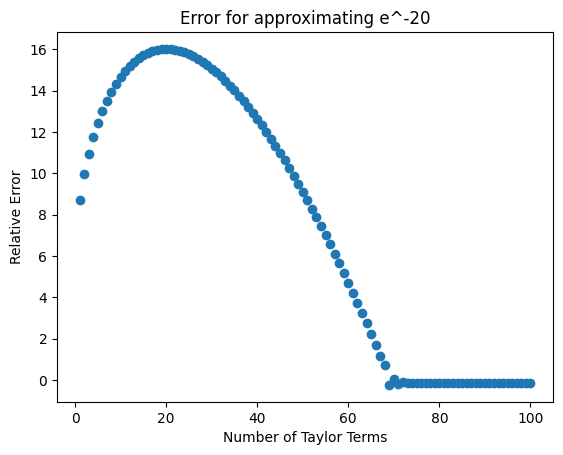

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

xVals = [i + 1 for i in range(100)] #this is just getting a list of all x values 1-100, please don't mind the list comprehension here

yVals = []
x = -20;
for i in range(100):
  yVals.append(np.log10(abs(S(x, i + 1) - math.exp(x))/math.exp(x)))


fig, ax = plt.subplots()
ax.scatter(xVals, yVals)

plt.title("Error for approximating e^-20")
plt.xlabel("Number of Taylor Terms")
plt.ylabel("Relative Error")

1.3 Unless you did something very clever and unusual to compute the sum,
you will have observed above that S(−20, n) does not converge to exp(−20)
when calculated in floating-point arithmetic. Why not?

The series is not converging possibly because of rounding error.  The floating-point numbers have limited precision, so the sum will only get as close as the machine epsilon allows.

Another reason is because half of the terms in the Taylor sequence will be negative, which forces the sum to oscillate as more terms are added.

1.4

We can find e^-20 by first finding the power series of e^20 and taking the reciprocal of it.


In [ ]:
e20 = S(20,100) #e^20 with 100 terms
print("error using S(-20, 100):", abs(S(-20, 100) - math.exp(-20)))
print("error using 1/S(20,100):", abs(1/e20 - math.exp(-20)))


error using S(-20, 100): 1.513343330785637e-09
error using 1/S(20,100): 4.1359030627651384e-25


2.1

In [ ]:
def d_c(f,x,h):
  return (f(x+h)-f(x-h))/(2*h)

2.2

In [ ]:
def g(x):
  return 1/(1+x**2)


2.3

<ipython-input-32-069b2174a3dd>:11: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(hVals), np.log10(eVals))


Text(0, 0.5, 'log of Error for g(x)')

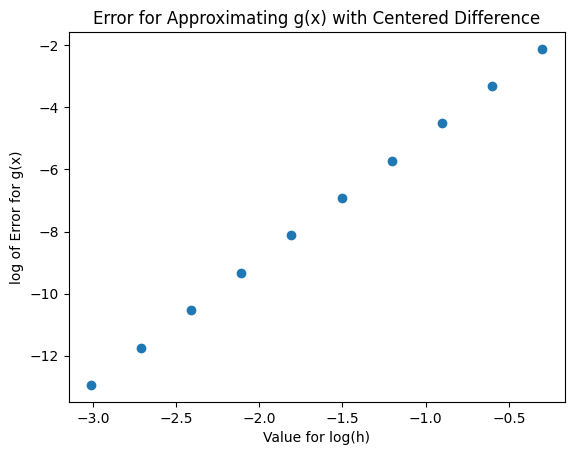

In [ ]:
def e_c(h):
  est = d_c(g,1,h)
  real = -0.5 #g'(x) = -(2*x)/(x^2+1)^2
  return abs(est-real)

#graph
hVals = [2**-k for k in range(1,15)]
eVals = [e_c(h) for h in hVals]

fig, ax = plt.subplots()
ax.scatter(np.log10(hVals), np.log10(eVals))

plt.title("Error for Approximating g(x) with Centered Difference")
plt.xlabel("Value for log(h)")
plt.ylabel("log of Error for g(x)")

2.4

[-0.30103    -0.60205999 -0.90308999 -1.20411998 -1.50514998 -1.80617997
 -2.10720997 -2.40823997 -2.70926996 -3.01029996 -3.31132995 -3.61235995
 -3.91338994]


<ipython-input-26-041cfe515c25>:1: RuntimeWarning: divide by zero encountered in log10
  slopeVals = [(np.log10(e_c(hVals[i+1])) - np.log10(e_c(hVals[i]))) / np.log10(1/2) for i in range(((len(hVals)-1)))]
<ipython-input-26-041cfe515c25>:1: RuntimeWarning: invalid value encountered in double_scalars
  slopeVals = [(np.log10(e_c(hVals[i+1])) - np.log10(e_c(hVals[i]))) / np.log10(1/2) for i in range(((len(hVals)-1)))]


Text(0, 0.5, 'Value for slope of error')

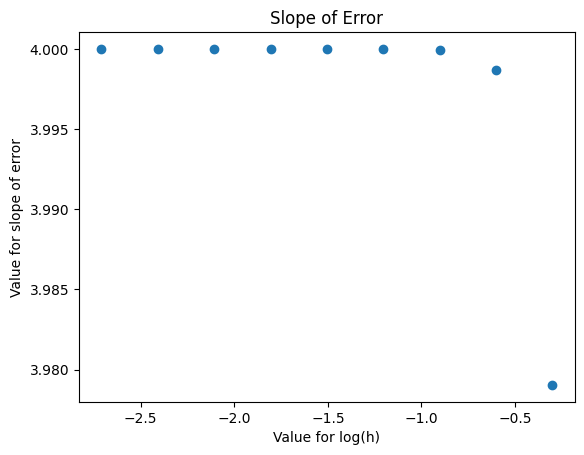

In [ ]:
slopeVals = [(np.log10(e_c(hVals[i+1])) - np.log10(e_c(hVals[i]))) / np.log10(1/2) for i in range(((len(hVals)-1)))]


fig, ax = plt.subplots()
ax.scatter(np.log10(hVals[:-1]), slopeVals)

plt.title("Slope of Error")
plt.xlabel("Value for log(h)")
plt.ylabel("Value for slope of error")

2.5

The value of *a* is about 4, since the slope of the log of the errors is 4.  